In [1]:
import cv2
import mediapipe as mp
import time
from matplotlib import pyplot as plt

In [2]:
# 얼굴 검출을 위한 객체
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    refine_landmarks=True,
    static_image_mode=True,
    max_num_faces=3,
)

In [3]:
# Face Mesh를 그리기 위한 객체
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

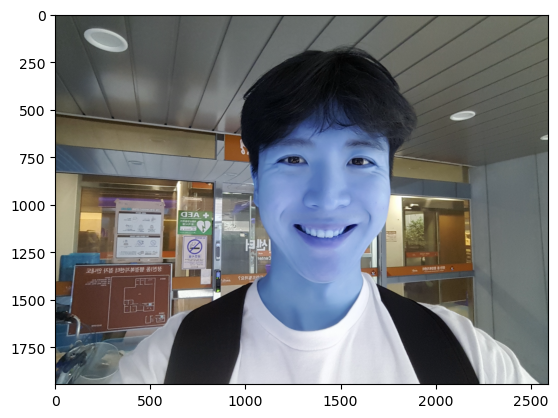

In [4]:
# 이미지 읽기
image = cv2.imread("data/happy.jpg")
plt.imshow(image)
plt.show()

In [5]:
# 얼굴 검출
results = face_mesh.process(image)

In [6]:
# Face Mesh 그리기
for single_face_landmarks in results.multi_face_landmarks:
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=single_face_landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec,
    )

# 이미지로 저장
cv2.imwrite("data/face-mesh.jpg", image)

True

<a href="https://github.com/google/mediapipe/blob/master/mediapipe/modules/face_geometry/data/canonical_face_model_uv_visualization.png">랜드마크 번호 확인</a>

#### Ex. 코 끝 확인

In [14]:
NOSE_INDEX = 1

for single_face_landmarks in results.multi_face_landmarks:
    coordinates = single_face_landmarks.landmark[NOSE_INDEX]
    print(coordinates.x, coordinates.y) #z축은 해당 연구에 필요없으므로 제외

0.5620619654655457 0.5179941058158875


### bounding box

In [11]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

In [12]:
face_detection_results = face_detection.process(image[:,:,::-1])
if face_detection_results.detections:

    for face_no, face in enumerate(face_detection_results.detections):

        print(f'FACE NUMBER: {face_no+1}')
        print('==============================')

        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

        face_data = face.location_data

        print(f'nFACE BOUNDING BOX:n{face_data.relative_bounding_box}')

        for i in range(2):

            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}')

FACE NUMBER: 1
FACE CONFIDENCE: 0.89
nFACE BOUNDING BOX:nxmin: 0.3887060284614563
ymin: 0.2813936173915863
width: 0.31913554668426514
height: 0.4254864752292633

RIGHT_EYE:
x: 0.49161237478256226
y: 0.40363529324531555

LEFT_EYE:
x: 0.619417667388916
y: 0.41102007031440735



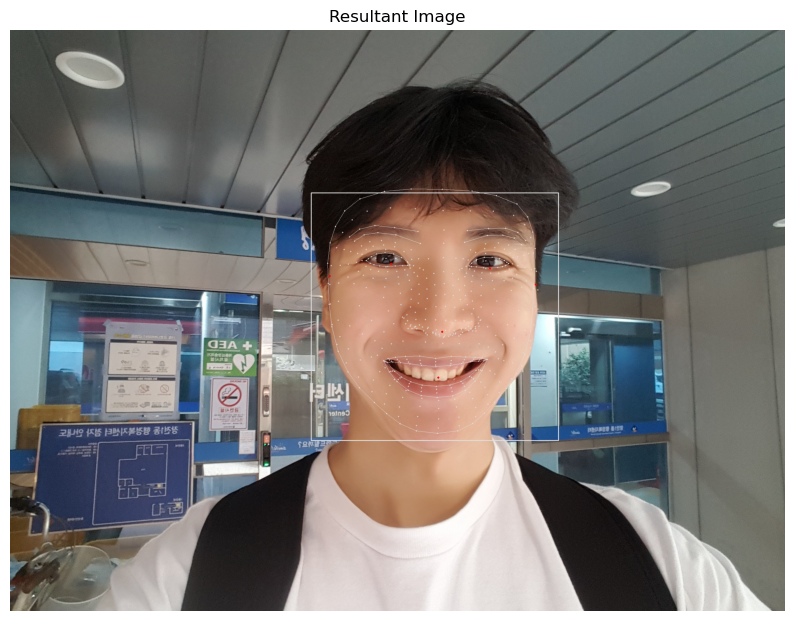

In [13]:
img_copy = image[:,:,::-1].copy()

if face_detection_results.detections:

    for face_no, face in enumerate(face_detection_results.detections):

        mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()
